<a href="https://colab.research.google.com/github/slvDev/Digit-Recognizer-CNN-Keras/blob/master/Digit_Recognizer_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

## Digit Recognizer CNN | Keras
*   Initial step
*   Data preparation
*   Create the model.
*   Evaluate the model
*   Make a submission.


### **Initial step**

Basic initial step import required libraries

*   matplotlib - plot images and results
*   pandas - reading and manipulating data
*   numpy - linear algebra
*   tensorflow - self-explanatory
*   sklearn - only for data splitting and confusion matrix
*   randrange - for selecting random images

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from random import randrange

## Data preparation

Load the training data with pandas and explore it

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/train.csv')
print(f'The train set contain {df_train.shape[0]} examples')
df_train.head(3)


The train set contain 42000 examples


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Looks like we have in first column labels and everything else it's an unrolled 28x28 image.
Extract Labels to different data.

In [0]:
X_train = df_train.drop('label', axis = 1)
y_train = df_train['label']

Let's plot the training set. Looks like we have a balanced data set.

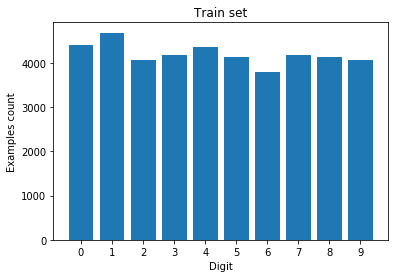

In [5]:
digits = y_train.unique()
values = y_train.value_counts()

plt.bar(digits, values)
plt.title('Train set')
plt.xlabel('Digit')
plt.ylabel('Examples count')
plt.xticks(np.arange(len(digits)))
plt.show()

Normalize training examples.

Normalization makes training more efficient. Why this happening? I will write a post later.

In [0]:
#X_train = normalize(X_train)
X_train = X_train / 255

Reshape training set.

In [7]:
#X_train = X_train.values.reshape(-1,28,28,1)
X_train.shape

(42000, 784)

Now we can plot random images with the label.
Just rerun the cell and explore different training examples.

Now we need convert our label to "one hot vector".
Print the result to make sure everything is right.

In [8]:
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

Split the data into three sets.

Since data it significantly small we will split to:

*   train - 80%
*   valid - 10%
*   test - 10%




In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

### Data augmentation. 

When working with images is always not enough data. With Keras we can augment it in the fly using ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        )

train_datagen.fit(X_train)

## Create the model.

Our playground. Feel free to try a different variation

In [0]:
model = tf.keras.models.Sequential([        
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

Explore the model.

In [0]:
model.summary()

### Training

Batch size is another hyperparameter to tune.
Finally, train the model.

In [21]:
#batch_size = 32
history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_val, y_val),
        )

Train on 33600 samples, validate on 4200 samples
Epoch 1/50
33600/33600 [==============================] - 12s 369us/sample - loss: 1.4489 - acc: 0.5817 - val_loss: 0.4342 - val_acc: 0.8669
Epoch 2/50
33600/33600 [==============================] - 11s 338us/sample - loss: 0.6348 - acc: 0.8160 - val_loss: 0.2759 - val_acc: 0.9155
Epoch 3/50
33600/33600 [==============================] - 11s 339us/sample - loss: 0.4775 - acc: 0.8619 - val_loss: 0.1960 - val_acc: 0.9395
Epoch 4/50
33600/33600 [==============================] - 11s 341us/sample - loss: 0.3832 - acc: 0.8860 - val_loss: 0.1867 - val_acc: 0.9414
Epoch 5/50
33600/33600 [==============================] - 11s 340us/sample - loss: 0.3258 - acc: 0.9041 - val_loss: 0.1504 - val_acc: 0.9529
Epoch 6/50
33600/33600 [==============================] - 11s 342us/sample - loss: 0.2802 - acc: 0.9166 - val_loss: 0.1318 - val_acc: 0.9600
Epoch 7/50
33600/33600 [==============================] - 12s 345us/sample - loss: 0.2512 - acc: 0.9226 -

## Evaluate the model

Plot our accuracy and loss for understanding problems: "high bias" and "high variance".

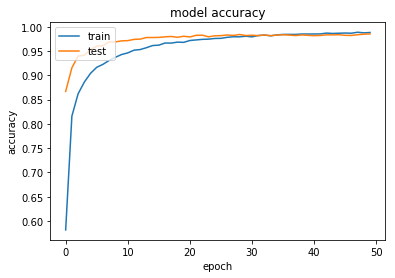

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

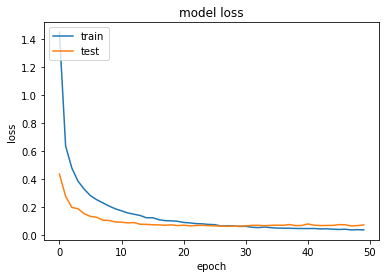

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

After finishing playing with model and we are happy with achieved accuracy, evaluate your model on the test set.

In [24]:
model.evaluate(X_test, y_test)

4200/4200 [==============================] - 0s 99us/sample - loss: 0.0796 - acc: 0.9836


[0.07959550130419389, 0.9835714]

Good job. 

Let's look at the confusion matrix.

In [25]:
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)


array([[371,   0,   0,   1,   0,   0,   1,   0,   1,   0],
       [  0, 446,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1, 401,   1,   0,   0,   0,   1,   1,   2],
       [  0,   0,   2, 412,   0,   1,   0,   0,   1,   0],
       [  1,   2,   0,   0, 384,   0,   2,   0,   0,   2],
       [  0,   0,   0,   9,   1, 379,   2,   0,   3,   3],
       [  1,   0,   0,   0,   0,   2, 439,   0,   0,   0],
       [  0,   2,   1,   0,   1,   0,   0, 445,   0,   6],
       [  1,   0,   0,   2,   2,   0,   1,   1, 427,   2],
       [  2,   0,   1,   0,   1,   1,   0,   1,   1, 427]])

## Make a submission.

Load test data, normalize and reshape it.

In [0]:
test = pd.read_csv('/content/drive/My Drive/test.csv')
test = test / 255
test = test.values.reshape(-1,28,28,1)
print(f'The test set contain {test.shape[0]} examples')

The test set contain 28000 examples


Make prediction on test.csv

In [0]:
pred = model.predict(test)
pred = np.argmax(pred, axis = 1)

Create dataframe

In [0]:
pred_csv = pd.DataFrame(pred, columns= ['Label'])
pred_csv.index += 1
pred_csv.head()

,Label
1,2
2,0
3,9
4,0
5,3


Save dataframe as a csv file

In [0]:
pred_csv.to_csv('/content/DR.csv', index_label='ImageId' )